# Trying to process image to look like images from dataset

In [11]:
import torch
import torchvision
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image
from load_dataset import load_dataset_pytorch
from torchvision import transforms

os.chdir('/Users/joeholt/Documents/College Local/Current/CS 639/proj/test')

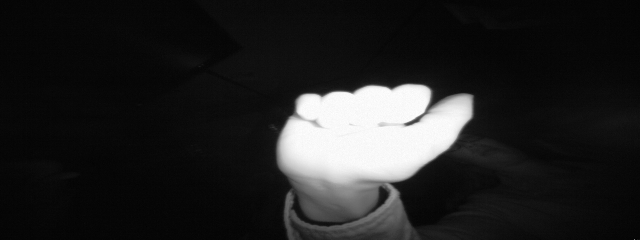

In [3]:
data_thumb_path = os.path.join(os.getcwd(), 'data', 'gesture_data', 'train', 'thumb', 'frame_00_05_0002.png')
Image.open(data_thumb_path)

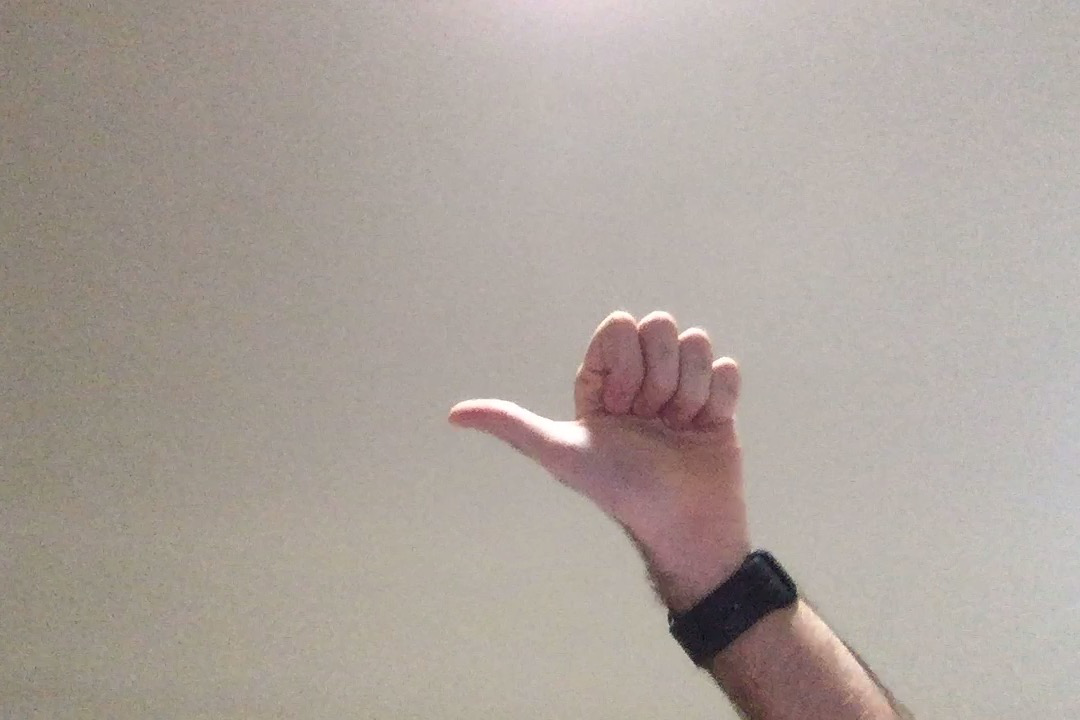

In [7]:
my_hand_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb2.jpg')
in_thumb = Image.open(my_hand_path)
in_thumb

In [15]:
thumb_in = np.array(in_thumb)
thumb_in.shape

(720, 1080, 3)

In [17]:
thumb_gray = cv2.cvtColor(thumb_in, cv2.COLOR_BGR2GRAY)
thumb_gray.shape

(720, 1080)

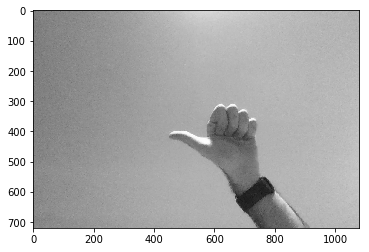

In [25]:
thump_gray3 = np.zeros_like(thumb_in)
thump_gray3[:,:,0] = thumb_gray
thump_gray3[:,:,1] = thumb_gray
thump_gray3[:,:,2] = thumb_gray
plt.imshow(thump_gray3)

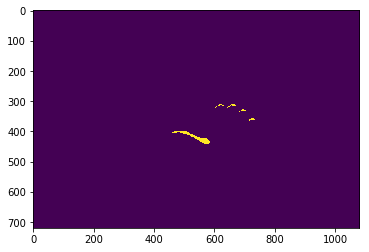

In [31]:
thumb_mask = cv2.threshold(thumb_gray, 240, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thumb_mask)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_bw = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)[1]
        return img_bw
        
    def _readImage(self, path, process=True):
        """
        Reads the image at the given location and returns it as an np array
        - Reads in BW by default
        """
        img = cv2.imread(path)

        if process:
            return self._processImage(img) 
        return img
        
    def createMask(self, img):
        """
        Creates a new mask from the passed image in relation to
        the base image
        
        Parameters:
        img (ndarray):
        - Image object
        
        Returns: Image of same size as input representing mask of difference
        """
        assert self.im_base is not None, "Error: im_base not set"

        # read image if we were passed a path
        if isinstance(img, str):
            img = self._readImage(img_path, process=False)

        # process image for our pipeline
        img_proc = self._processImage(img)

        # make sure we have valid image
        assert img_proc.shape == self.im_base.shape, "Invalid shapes: base = {}, new = {}".format(self.im_base.shape, img.shape)
        
        mask = cv2.subtract(self.im_base, img_proc)
        
        return mask
        

